In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [9]:
def loadDataFrame():
    df=pd.read_csv('customers.csv')
    
    df=df[['Age','Income']]
    df['Age']=scale(df['Age'])
    df['Income']=scale(df['Income'])
    
    return df

In [10]:
df=loadDataFrame()

In [11]:
df

,Age,Income
0,0.742915,-0.718459
1,1.489490,1.384325
2,-0.252518,0.268032
3,-0.750235,-0.718459
4,1.489490,5.356249
...,...,...
845,-0.999093,-0.536737
846,-0.874664,-0.329054
847,-1.247951,-0.744419
848,-0.376947,-0.484816


In [12]:
from sklearn.cluster import KMeans

In [13]:
model=KMeans(n_clusters=3)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
model.labels_

array([2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,

In [17]:
df['cluster']=model.labels_

In [18]:
df

,Age,Income,cluster
0,0.742915,-0.718459,2
1,1.489490,1.384325,2
2,-0.252518,0.268032,0
3,-0.750235,-0.718459,0
4,1.489490,5.356249,1
...,...,...,...
845,-0.999093,-0.536737,0
846,-0.874664,-0.329054,0
847,-1.247951,-0.744419,0
848,-0.376947,-0.484816,0


In [19]:
df.groupby('cluster').mean()

,Age,Income
cluster,,
0,-0.745990,-0.416566
1,1.225993,2.970447
2,0.870738,0.132960


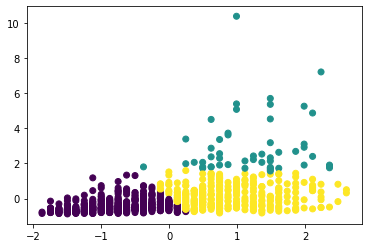

In [21]:
plt.scatter(df['Age'],df['Income'],c=model.labels_)

## Agglomerative

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
df=loadDataFrame()

In [25]:
model=AgglomerativeClustering(n_clusters=4)

In [26]:
model.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [27]:
model.labels_

array([2, 0, 2, 3, 0, 1, 2, 1, 3, 0, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, 2,
       3, 1, 0, 1, 3, 2, 2, 2, 1, 2, 3, 2, 3, 2, 2, 2, 3, 0, 3, 0, 3, 0,
       1, 1, 3, 3, 3, 2, 1, 2, 3, 1, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2,
       2, 3, 2, 3, 2, 1, 2, 3, 3, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 3, 3, 3,
       3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 0, 2, 1, 3, 1, 2, 3, 2, 1,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 3, 3, 3, 2, 2,
       2, 2, 3, 2, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 2, 1, 3, 3, 2, 1, 2, 1,
       2, 2, 0, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 1,
       2, 3, 3, 1, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 3, 1,
       0, 2, 0, 2, 3, 2, 1, 1, 2, 0, 1, 3, 2, 2, 2, 1, 2, 3, 1, 3, 2, 1,
       3, 0, 2, 3, 2, 2, 1, 3, 2, 1, 2, 2, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 3, 2, 0, 1, 2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2, 2, 3,
       1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 0, 0, 3, 0, 2,
       2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1,

In [28]:
df['cluster']=model.labels_

In [29]:
df.groupby('cluster').mean()

,Age,Income
cluster,,
0,1.277500,2.874637
1,1.353448,0.336567
2,0.046305,-0.167374
3,-1.114908,-0.542727


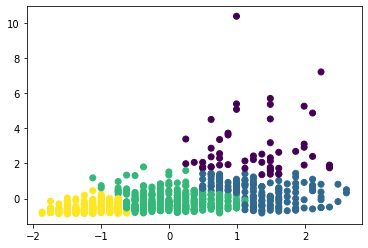

In [30]:
plt.scatter(df['Age'],df['Income'],c=model.labels_)

In [31]:
pd.Series(model.labels_).value_counts()

2    386
3    260
1    150
0     54
dtype: int64

## DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
df=loadDataFrame()

In [34]:
model=DBSCAN(eps=.5,min_samples=7)

In [35]:
model.fit(df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [36]:
model.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [37]:
pd.Series(model.labels_).value_counts()

 0    827
-1     23
dtype: int64

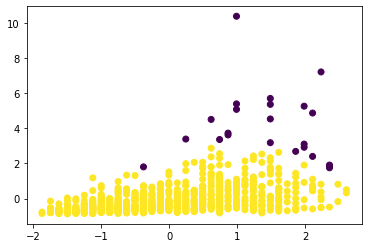

In [38]:
plt.scatter(df['Age'],df['Income'],c=model.labels_)